In [1]:
#Generates extracted mass spectrum graph
#Jan 2019 Will Cheney

import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
#%matplotlib notebook


In [2]:
#File Must have Weight and Abundance column 
def readSpectra(filename):
    weights = []
    amount = []
    with open(filename,mode = 'rt',encoding= 'UTF-8')as csvFile:
        reader = pd.read_csv(csvFile)
        max1 = reader['Abundance'].max()
        for row in reader['Weight']:
            weights.append(row)
        for row in reader['Abundance']:
            amount.append(row/max1)
    return weights, amount

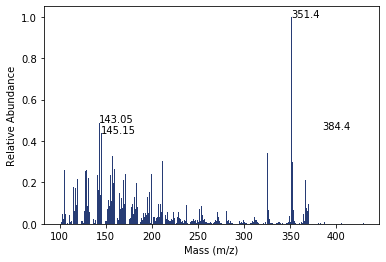

In [7]:
weights, amount = readSpectra('/Users/willcheney/Code/code/2020-07-25/7dehydro spectrum.CSV')
majorPeaks = []
for values in zip(weights,amount):
    #if values[1] >= 0.40 and values[0] >390:
        #majorPeaks.append(values)
    if values[1] >= 0.40:  #Value determines cut off for annotation
        majorPeaks.append(values)


plt.bar(weights, amount, color = '#273c75')
for i in majorPeaks:
    plt.annotate(str(i[0]),i)
#plt.title("Cholesterol std no anno")
plt.xlabel('Mass (m/z)')
plt.ylabel('Relative Abundance')
fig = plt.gcf()
plt.show()

In [8]:
fig.savefig('2020-07-25 7-dehydrocholesterol spectrum',dpi = 300, bbox_inches='tight')

<IPython.core.display.Javascript object>


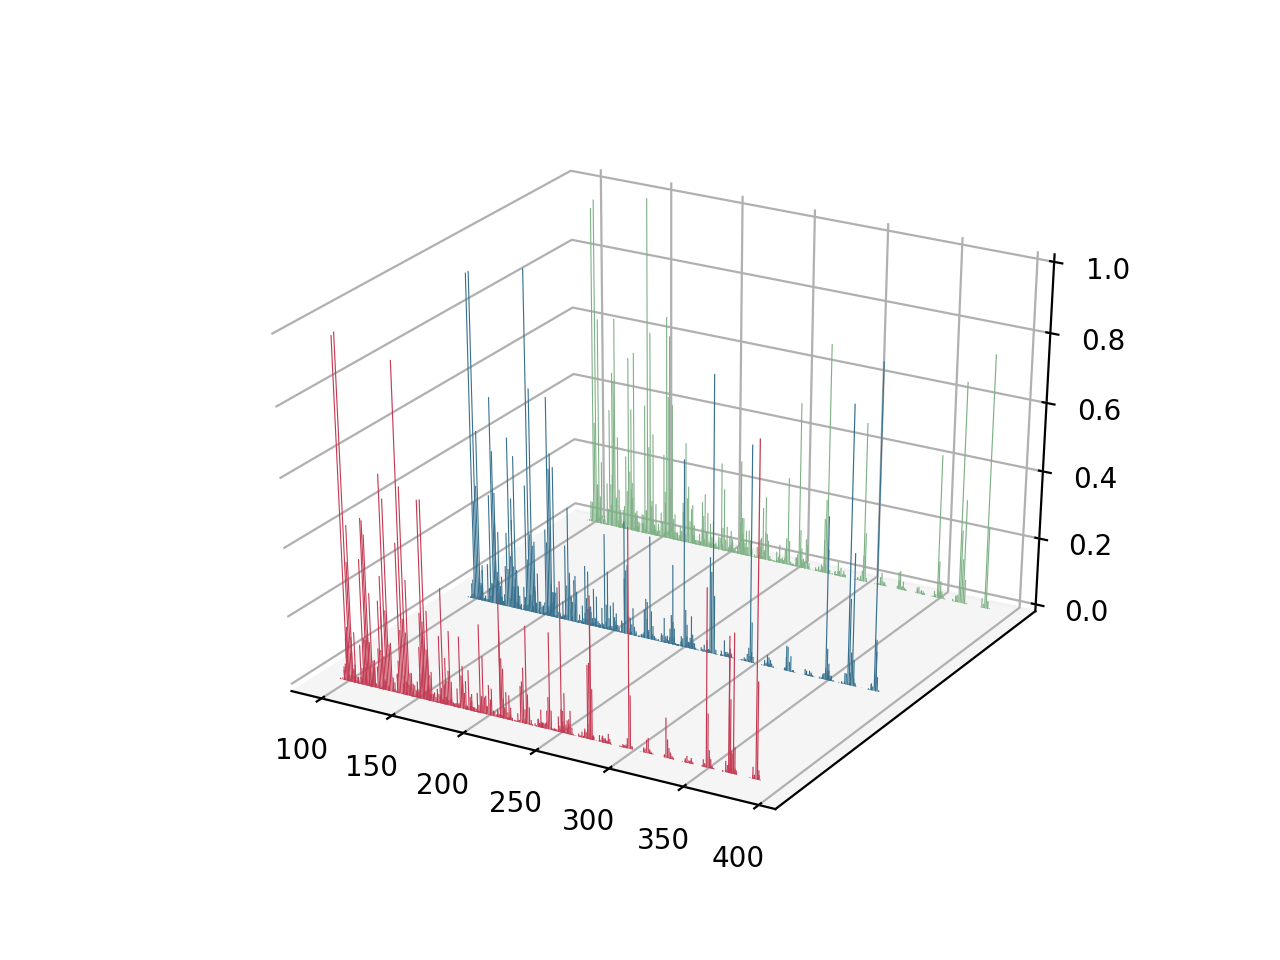

In [71]:
std_weight, std_amount = readSpectra('/Users/willcheney/GC-MS sterols/2020-01-31 For thesis/chole std MS.CSV')
d2_weight, d2_amount = readSpectra('/Users/willcheney/GC-MS sterols/2020-01-31 For thesis/d2 MS.CSV') 
wcy71_weight, wcy71_amount = readSpectra('/Users/willcheney/GC-MS sterols/2020-01-31 For thesis/wcy71 MS.CSV')

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_yticks([])
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
#ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

ax.bar(std_weight, std_amount, 1, zdir='y', color = '#C33C54' )
ax.bar(d2_weight, d2_amount, 2, zdir='y', color = '#37718E' )
ax.bar(wcy71_weight, wcy71_amount, 3, zdir='y', color = '#7FB186' )
fig = plt.gcf()

plt.show()

In [72]:
fig.savefig('2020-02-04 all MS II',dpi = 300, bbox_inches='tight')